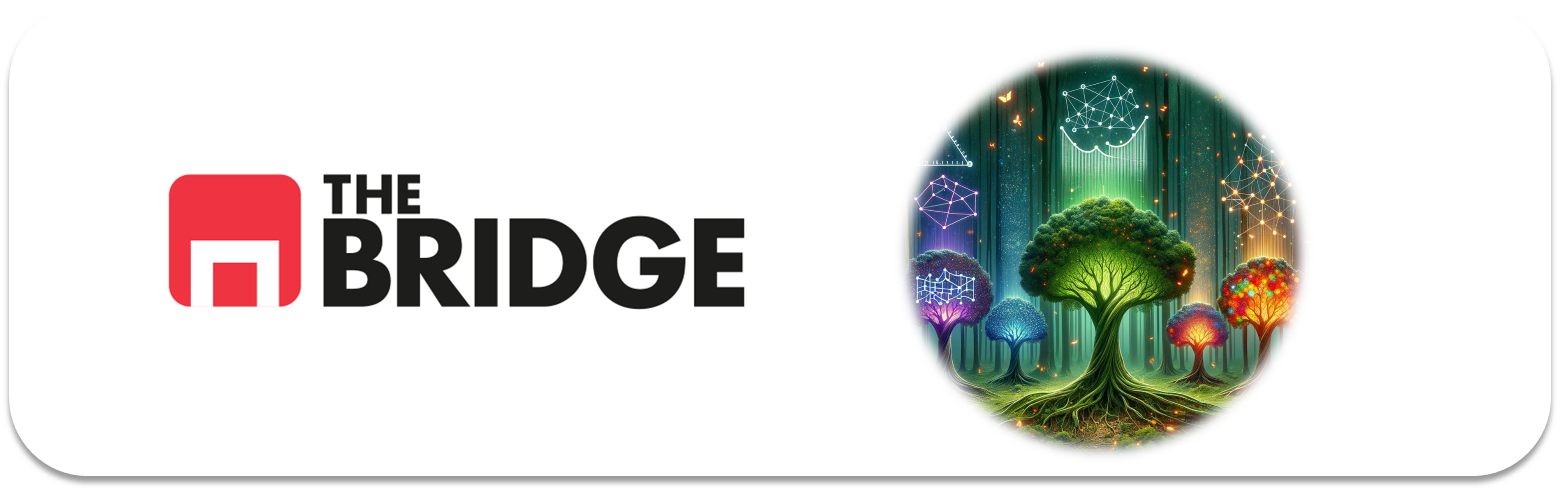

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

### 1. Loading the dataset

In [393]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# For the output of this notebook to be stable in all executions
np.random.seed(42)

In [394]:
df_bank = pd.read_csv('data/bank-full.csv', sep = ';')
df_bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [395]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 2. Graphical analysis of the target variable: y

In [396]:
target = df_bank['y']

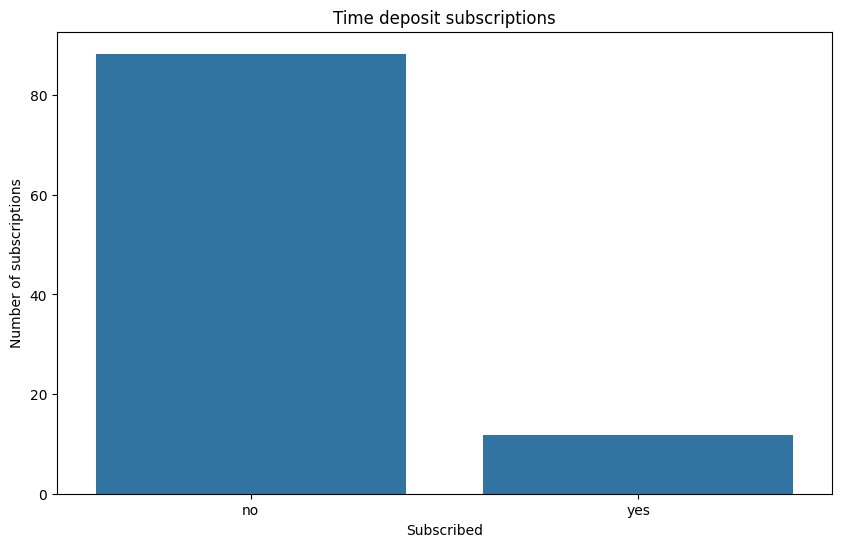

In [397]:
# Create a bar chart in relative frequencies
relative_frequencies = target.value_counts(normalize = True) * 100

plt.figure(figsize = (10, 6))
sns.barplot(x = relative_frequencies.index, y = relative_frequencies.values, legend = False)

# Add title and tags
plt.title('Time deposit subscriptions')
plt.xlabel('Subscribed')
plt.ylabel('Number of subscriptions')

plt.show()

Most contacts (almost 90%) do not end up subscribing to a term deposit.

### 3. Split in train and test

In [398]:
from sklearn.model_selection import train_test_split

# Divide the dataset into train and test (80% - 20%)
X = df_bank.drop(['y'], axis = 1)
y = df_bank['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 4. Mini-EDA

In [399]:
df_bank_eda = X_train.copy()
df_bank_eda['y'] = y_train.copy()

In [400]:
df_typification = pd.DataFrame([df_bank_eda.nunique(), df_bank_eda.nunique()/len(df_bank_eda) * 100, df_bank_eda.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Type"})
df_typification

,Card,%_Card,Type
age,77,0.212895,int64
job,12,0.033179,object
marital,3,0.008295,object
education,4,0.01106,object
default,2,0.00553,object
balance,6652,18.391949,int64
housing,2,0.00553,object
loan,2,0.00553,object
contact,3,0.008295,object
day,31,0.085711,int64


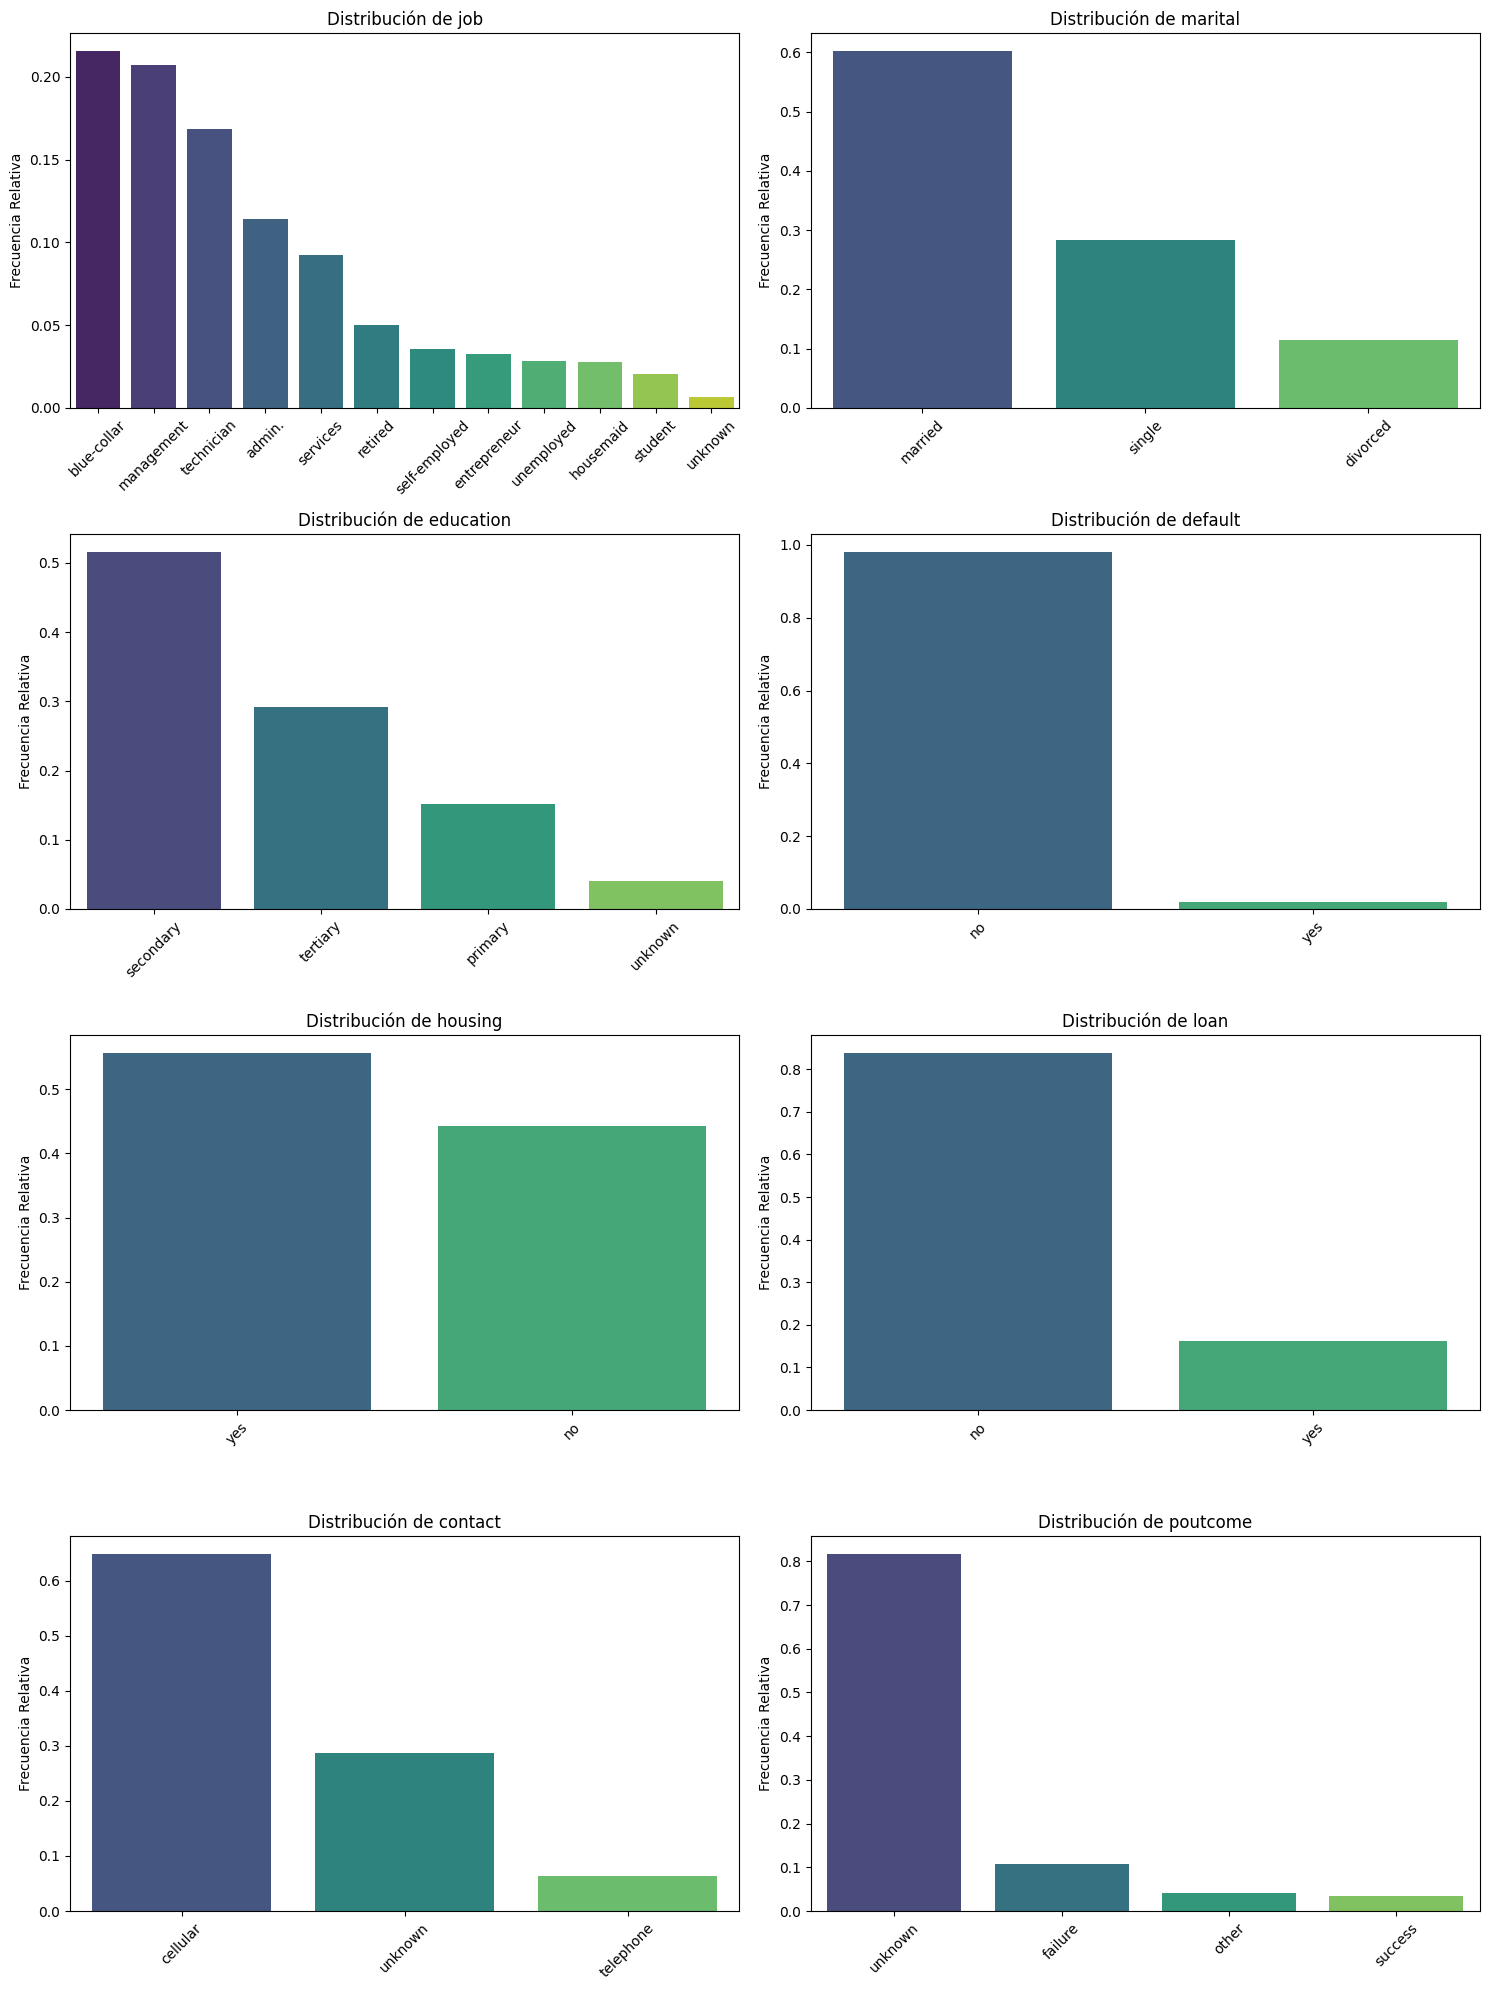

In [401]:
import bootcampviztools as boot

cat_cols = ['job',
            'marital',
            'education',
            'default',
            'housing',
            'loan',
            'contact',
            'poutcome'
]

boot.pinta_distribucion_categoricas(df_bank_eda, columnas_categoricas = cat_cols, relativa = True, mostrar_valores = False)

The columns 'default' and 'poutcome' give us very little information, since the data we have within these categories are very unbalanced, and that is why I am going to eliminate them.

In [402]:
df_bank_eda.drop(['default', 'poutcome'], axis = 1, inplace = True)
df_bank_eda.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
3344,41,blue-collar,married,primary,849,yes,no,unknown,15,may,72,1,-1,0,no
17965,49,technician,married,primary,1415,yes,no,cellular,30,jul,269,2,-1,0,no
18299,42,admin.,married,secondary,3842,no,no,cellular,31,jul,130,4,-1,0,no
10221,37,management,single,tertiary,-119,yes,no,unknown,11,jun,375,11,-1,0,no
32192,56,blue-collar,married,primary,3498,no,no,cellular,15,apr,264,2,-1,0,yes


In [403]:
df_bank_eda.describe()

,age,balance,day,duration,campaign,pdays,previous
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.930823,1361.046146,15.817739,256.891202,2.765649,40.180076,0.580264
std,10.618369,3023.083187,8.325860,256.884103,3.120193,100.107617,2.370668
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,70.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,447.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1429.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Almost no customers (less than 25%) were previously contracted, so the column 'pdays' does not provide us with much information and I am going to eliminate it.   

The same goes for the column 'previous'.

In [404]:
df_bank_eda.drop(['pdays', 'previous'], axis = 1, inplace = True)
df_bank_eda.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,y
3344,41,blue-collar,married,primary,849,yes,no,unknown,15,may,72,1,no
17965,49,technician,married,primary,1415,yes,no,cellular,30,jul,269,2,no
18299,42,admin.,married,secondary,3842,no,no,cellular,31,jul,130,4,no
10221,37,management,single,tertiary,-119,yes,no,unknown,11,jun,375,11,no
32192,56,blue-collar,married,primary,3498,no,no,cellular,15,apr,264,2,yes


(2,)


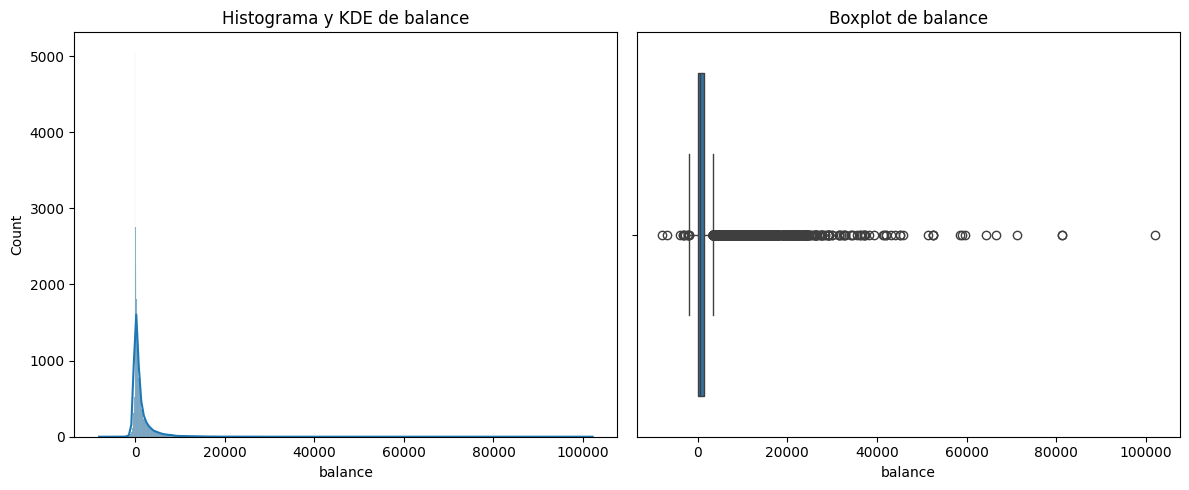

In [405]:
boot.plot_combined_graphs(df_bank_eda, ['balance'])

This category has a very large dispersion, so it will have to be dealt with in the future (probably using a logarithmic scale).

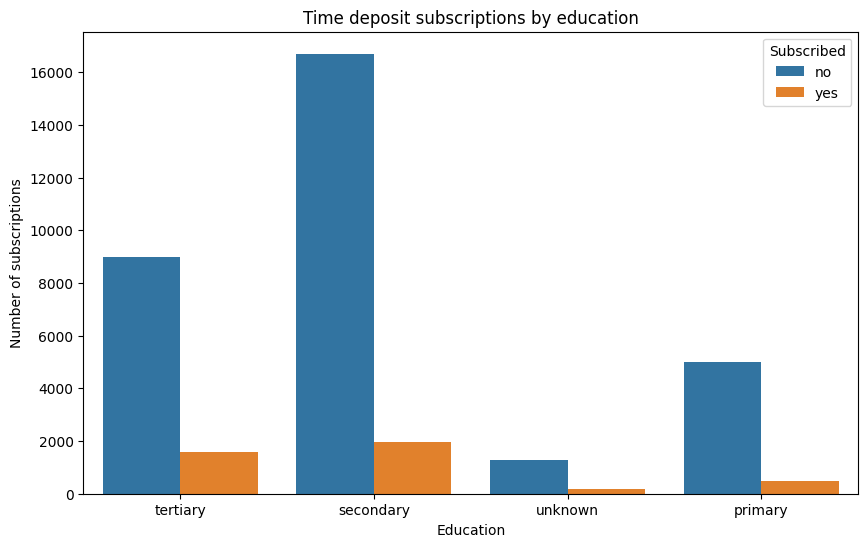

In [406]:
# Create a bar chart in relative frequencies
plt.figure(figsize = (10, 6))
sns.countplot(data = df_bank_eda, x = 'education', hue = target)

# Add title and tags
plt.title('Time deposit subscriptions by education')
plt.xlabel('Education')
plt.ylabel('Number of subscriptions')
plt.legend(title = 'Subscribed')

plt.show()

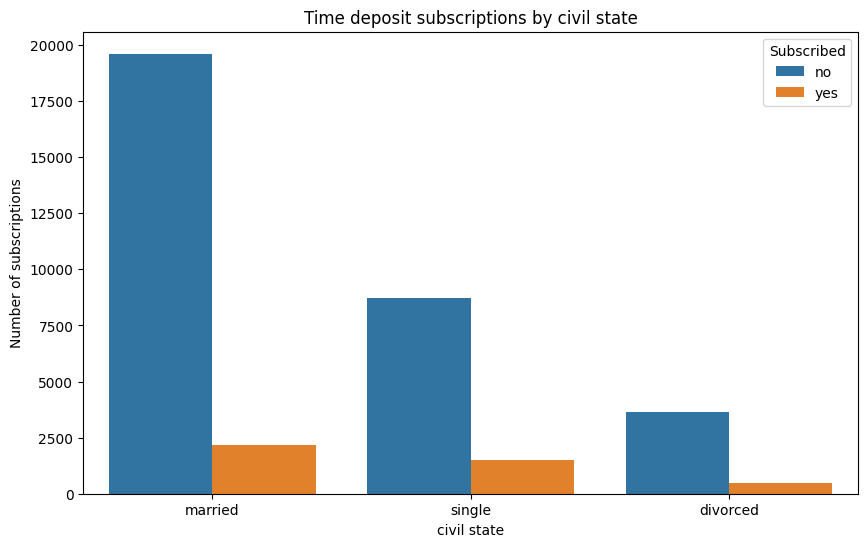

In [407]:
# Create a bar chart in relative frequencies
plt.figure(figsize = (10, 6))
sns.countplot(data = df_bank_eda, x = 'marital', hue = target)

# Add title and tags
plt.title('Time deposit subscriptions by civil state')
plt.xlabel('civil state')
plt.ylabel('Number of subscriptions')
plt.legend(title = 'Subscribed')

plt.show()

In [408]:
df_bank_eda.month.value_counts()

month
may    10963
jul     5537
aug     4966
jun     4318
nov     3173
apr     2344
feb     2112
jan     1135
oct      599
sep      464
mar      374
dec      183
Name: count, dtype: int64

### 4. Processing of categorical columns

In [409]:
from sklearn.preprocessing import OrdinalEncoder

months = [['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]
ordinal_encoder = OrdinalEncoder(categories = months)

X_train['ordinal_month'] = ordinal_encoder.fit_transform(X_train[['month']])
X_test['ordinal_month'] = ordinal_encoder.fit_transform(X_test[['month']])
X_train[['ordinal_month', 'month']].sample(20)

,ordinal_month,month
11019,5.0,jun
3403,4.0,may
12260,5.0,jun
45110,9.0,oct
39549,4.0,may
24269,10.0,nov
28145,0.0,jan
22888,7.0,aug
10792,5.0,jun
11456,5.0,jun


In [410]:
df_bank_eda.drop(['month'], axis = 1, inplace = True)

In [411]:
df_bank_eda_order = pd.get_dummies(df_bank_eda, dtype = int)
df_bank_eda_order

,age,balance,day,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,y_no,y_yes
3344,41,849,15,72,1,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
17965,49,1415,30,269,2,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
18299,42,3842,31,130,4,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
10221,37,-119,11,375,11,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,0
32192,56,3498,15,264,2,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,1059,18,2093,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
44732,23,508,8,210,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
38158,34,1317,15,239,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
860,33,165,7,111,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0


In [412]:
df_bank_eda_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 3344 to 15795
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  36168 non-null  int64
 1   balance              36168 non-null  int64
 2   day                  36168 non-null  int64
 3   duration             36168 non-null  int64
 4   campaign             36168 non-null  int64
 5   job_admin.           36168 non-null  int32
 6   job_blue-collar      36168 non-null  int32
 7   job_entrepreneur     36168 non-null  int32
 8   job_housemaid        36168 non-null  int32
 9   job_management       36168 non-null  int32
 10  job_retired          36168 non-null  int32
 11  job_self-employed    36168 non-null  int32
 12  job_services         36168 non-null  int32
 13  job_student          36168 non-null  int32
 14  job_technician       36168 non-null  int32
 15  job_unemployed       36168 non-null  int32
 16  job_unknown          361

In [415]:
# Correlation matrix
df_bank_eda = X_train.copy()
df_bank_eda["y"] = y_train.copy()

np.abs(df_bank_eda.corr()['y']).sort_values(ascending = False)

ValueError: could not convert string to float: 'blue-collar'

In [291]:
corr = np.abs(df_bank_eda.corr()['y']).sort_values(ascending = False)

# Features with less than 0.05 correlation vs. target
bad_corr_feat = corr[corr < 0.05].index.values

# Filter out the good columns
df_bank_eda.drop(columns = bad_corr_feat, inplace = True)

KeyError: 'y'

### 5. Training and visualization